In [2]:
import os
import cv2
import torch
import easyocr
import tkinter as tk
from tkinter import filedialog
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [3]:
def train_yolo(data_yaml, epochs=20, imgsz=640, model_path='yolov8m.pt'):
    model = YOLO(model_path)
    model.train(data=data_yaml, epochs=epochs, imgsz=imgsz)
    return model

In [4]:
#model = train_yolo(data_yaml)

In [6]:
def load_model(model_path):
    return YOLO(model_path)

In [7]:
def browse_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])
    return file_path

In [8]:
def detect_objects(model, image_path):
    results = model(image_path)
    detections = results[0].boxes.data.cpu().numpy()
    return detections, results[0].plot()


In [9]:
def extract_number_plate(image_path, detections):
    image = cv2.imread(image_path)
    reader = easyocr.Reader(['en'])
    
    for det in detections:
        class_id = int(det[5])  # Class index
        x1, y1, x2, y2 = map(int, det[:4])
        
        if class_id == 3:  # Class 'number plate'
            plate_roi = image[y1:y2, x1:x2]
            plate_text = reader.readtext(plate_roi)
            extracted_text = ' '.join([res[1] for res in plate_text])
            
            plt.imshow(cv2.cvtColor(plate_roi, cv2.COLOR_BGR2RGB))
            plt.title(f"Extracted Number Plate: {extracted_text}")
            plt.show()
            return extracted_text
    
    return "No Number Plate Detected"

In [10]:
data_yaml = "C:/Users/Abhiram P/Desktop/Deep_learning_Project/coco128.yaml"
model_path = 'C://Users//Abhiram P//runs//detect//train7//weights//best.torchscript'

In [11]:
model = train_yolo(data_yaml)

New https://pypi.org/project/ultralytics/8.3.108 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.80  Python-3.11.4 torch-2.4.1+cpu CPU (Intel Core(TM) i7-10870H 2.20GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:/Users/Abhiram P/Desktop/Deep_learning_Project/coco128.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

train: Scanning C:\Users\Abhiram P\Desktop\Deep_learning_Project\train\labels.cache... 102 images, 0 backgrounds, 2 cor

train: WARNING  C:\Users\Abhiram P\Desktop\Deep_learning_Project\train\images\new128.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\Abhiram P\\Desktop\\Deep_learning_Project\\train\\images\\new128.jpg'
train: WARNING  C:\Users\Abhiram P\Desktop\Deep_learning_Project\train\images\new3.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'pfm', 'webp', 'mpo', 'png', 'jpg', 'tif', 'jpeg', 'tiff', 'heic', 'dng', 'bmp'}
videos: {'ts', 'avi', 'gif', 'mov', 'mp4', 'wmv', 'mkv', 'm4v', 'webm', 'mpg', 'asf', 'mpeg'}



val: Scanning C:\Users\Abhiram P\Desktop\Deep_learning_Project\val\labels.cache... 20 images, 0 backgrounds, 0 corrupt:


Plotting labels to C:\Users\Abhiram P\runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\Abhiram P\runs\detect\train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.143      2.852      1.438         67        640: 100%|██████████| 7/7 [04:14<00:00, 36.30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?

WARNING  NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<0

                   all         20         73       0.63       0.25      0.284      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.8425      1.306      1.148         48        640: 100%|██████████| 7/7 [04:00<00:00, 34.42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?

WARNING  NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<0

                   all         20         73       0.73       0.36      0.396      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.7856     0.9327      1.073         47        640: 100%|██████████| 7/7 [04:08<00:00, 35.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?

WARNING  NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<0

                   all         20         73      0.778      0.875      0.879      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.8128     0.8682      1.089         58        640: 100%|██████████| 7/7 [03:54<00:00, 33.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<0

                   all         20         73      0.801      0.887      0.934      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.7882     0.8376      1.073         46        640: 100%|██████████| 7/7 [03:47<00:00, 32.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<0

                   all         20         73      0.831      0.867      0.926      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.7734     0.7689      1.047         42        640: 100%|██████████| 7/7 [03:58<00:00, 34.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<0

                   all         20         73      0.758      0.806      0.871      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.7496     0.7097      1.064         46        640: 100%|██████████| 7/7 [03:50<00:00, 32.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<0

                   all         20         73       0.86      0.821      0.905      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.7808       0.73      1.094         59        640: 100%|██████████| 7/7 [03:54<00:00, 33.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<0

                   all         20         73      0.844      0.786      0.874      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      0.795     0.7104      1.098         47        640: 100%|██████████| 7/7 [04:16<00:00, 36.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<0

                   all         20         73      0.833      0.818      0.878      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.7918     0.6776      1.058         64        640: 100%|██████████| 7/7 [04:01<00:00, 34.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<0

                   all         20         73      0.824      0.826      0.874      0.671


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.7813     0.7791       1.07         20        640: 100%|██████████| 7/7 [03:48<00:00, 32.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<0

                   all         20         73      0.885      0.852      0.887      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.7225     0.6801      1.022         24        640: 100%|██████████| 7/7 [03:47<00:00, 32.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<0

                   all         20         73      0.845      0.838      0.906      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.6961     0.6324      1.008         21        640: 100%|██████████| 7/7 [04:00<00:00, 34.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<0

                   all         20         73      0.884      0.894      0.923      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.6868     0.6235      1.035         29        640: 100%|██████████| 7/7 [03:24<00:00, 29.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<0

                   all         20         73      0.935      0.876      0.929      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.6774     0.5833      1.032         22        640: 100%|██████████| 7/7 [03:22<00:00, 28.99
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<0

                   all         20         73      0.845      0.903      0.932      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.6852     0.5651      1.011         22        640: 100%|██████████| 7/7 [03:20<00:00, 28.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<0

                   all         20         73      0.909      0.863       0.95      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.6211     0.5064     0.9618         22        640: 100%|██████████| 7/7 [03:19<00:00, 28.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<0

                   all         20         73      0.901      0.912      0.957      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.5997     0.4739     0.9459         23        640: 100%|██████████| 7/7 [05:18<00:00, 45.43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<0

                   all         20         73      0.891      0.925      0.958      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.5804     0.4716     0.9373         21        640: 100%|██████████| 7/7 [04:41<00:00, 40.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<0

                   all         20         73       0.95      0.914      0.969      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.5491     0.4328     0.9159         26        640: 100%|██████████| 7/7 [04:55<00:00, 42.27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<0

                   all         20         73      0.935      0.919      0.972      0.809



20 epochs completed in 1.443 hours.
Optimizer stripped from C:\Users\Abhiram P\runs\detect\train8\weights\last.pt, 52.0MB
Optimizer stripped from C:\Users\Abhiram P\runs\detect\train8\weights\best.pt, 52.0MB

Validating C:\Users\Abhiram P\runs\detect\train8\weights\best.pt...
Ultralytics 8.3.80  Python-3.11.4 torch-2.4.1+cpu CPU (Intel Core(TM) i7-10870H 2.20GHz)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<0


                   all         20         73      0.934      0.919      0.972      0.809
           with helmet         12         13      0.906      0.923      0.986      0.772
        without helmet         10         15       0.93      0.887      0.951      0.793
                 rider         20         23      0.958      0.913      0.976      0.862
          number plate         20         22      0.944      0.955      0.975       0.81
Speed: 3.8ms preprocess, 709.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to C:\Users\Abhiram P\runs\detect\train8


In [12]:
model.export(format='torchscript') 


Ultralytics 8.3.80  Python-3.11.4 torch-2.4.1+cpu CPU (Intel Core(TM) i7-10870H 2.20GHz)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'C:\Users\Abhiram P\runs\detect\train8\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (49.6 MB)

TorchScript: starting export with torch 2.4.1+cpu...
TorchScript: export success  4.5s, saved as 'C:\Users\Abhiram P\runs\detect\train8\weights\best.torchscript' (99.1 MB)

Export complete (6.3s)
Results saved to C:\Users\Abhiram P\runs\detect\train8\weights
Predict:         yolo predict task=detect model=C:\Users\Abhiram P\runs\detect\train8\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=C:\Users\Abhiram P\runs\detect\train8\weights\best.torchscript imgsz=640 data=C:/Users/Abhiram P/Desktop/Deep_learning_Project/coco128.yaml  
Visualize:       https://netron.app


'C:\\Users\\Abhiram P\\runs\\detect\\train8\\weights\\best.torchscript'

In [13]:
model = load_model(model_path)

In [19]:
import torch

torch.save(model.state_dict(), 'model_weights.pt')


image 1/1 C:\Users\Abhiram P\Downloads\bik15.jpg: 640x640 2 without helmets, 1 rider, 1 number plate, 573.8ms
Speed: 6.6ms preprocess, 573.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


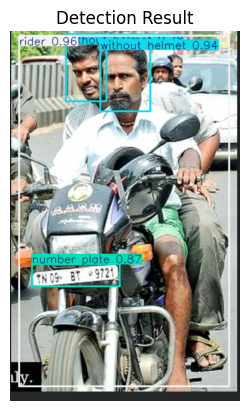

In [42]:
%matplotlib inline
image_path = "C:/Users/Abhiram P/Downloads/bik15.jpg"
detections, result_image = detect_objects(model, image_path)

plt.imshow(result_image[..., ::-1])
plt.axis('off')
plt.title("Detection Result")
plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


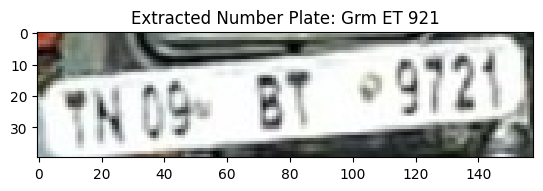

Detected Number Plate: Grm ET 921


In [43]:
plate_number = extract_number_plate(image_path, detections)
print("Detected Number Plate:", plate_number)